In [2]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the triangle function
def triangle_function(x, a, b, c):
    return a * np.maximum(0.05, 1 - np.abs(x - b) / c)

In [3]:
file_paths = [
    'final_timeseries_data/HYS14_1-2.csv',
    'final_timeseries_data/HYS14_2-3.csv',
    'final_timeseries_data/HYS14_3-4.csv',
    'final_timeseries_data/HYS14_4-5.csv',
]

# Create a dictionary to store the DataFrames
dataframes = {}

# Read each CSV file and create a DataFrame
for file_path in file_paths:
    # Extract the base name of the file (e.g., 'HYS14_1-2' from 'final_timeseries_data/HYS14_1-2.csv')
    base_name = file_path.split('/')[-1].split('.')[0]
    # Replace '-' with '' to get the desired DataFrame name (e.g., 'HYS14_12')
    df_name = base_name.replace('-', '')
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Convert the 'Date' column to datetime and set it as the index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Store the DataFrame in the dictionary with the desired name
    dataframes[df_name] = df

# Now you have individual DataFrames named HYS14_12, HYS14_23, HYS14_34, HYS14_45
# Example: Accessing the DataFrame for HYS14_12
HYS14_12 = dataframes['HYS14_12']
HYS14_23 = dataframes['HYS14_23']
HYS14_34 = dataframes['HYS14_34']
HYS14_45 = dataframes['HYS14_45']

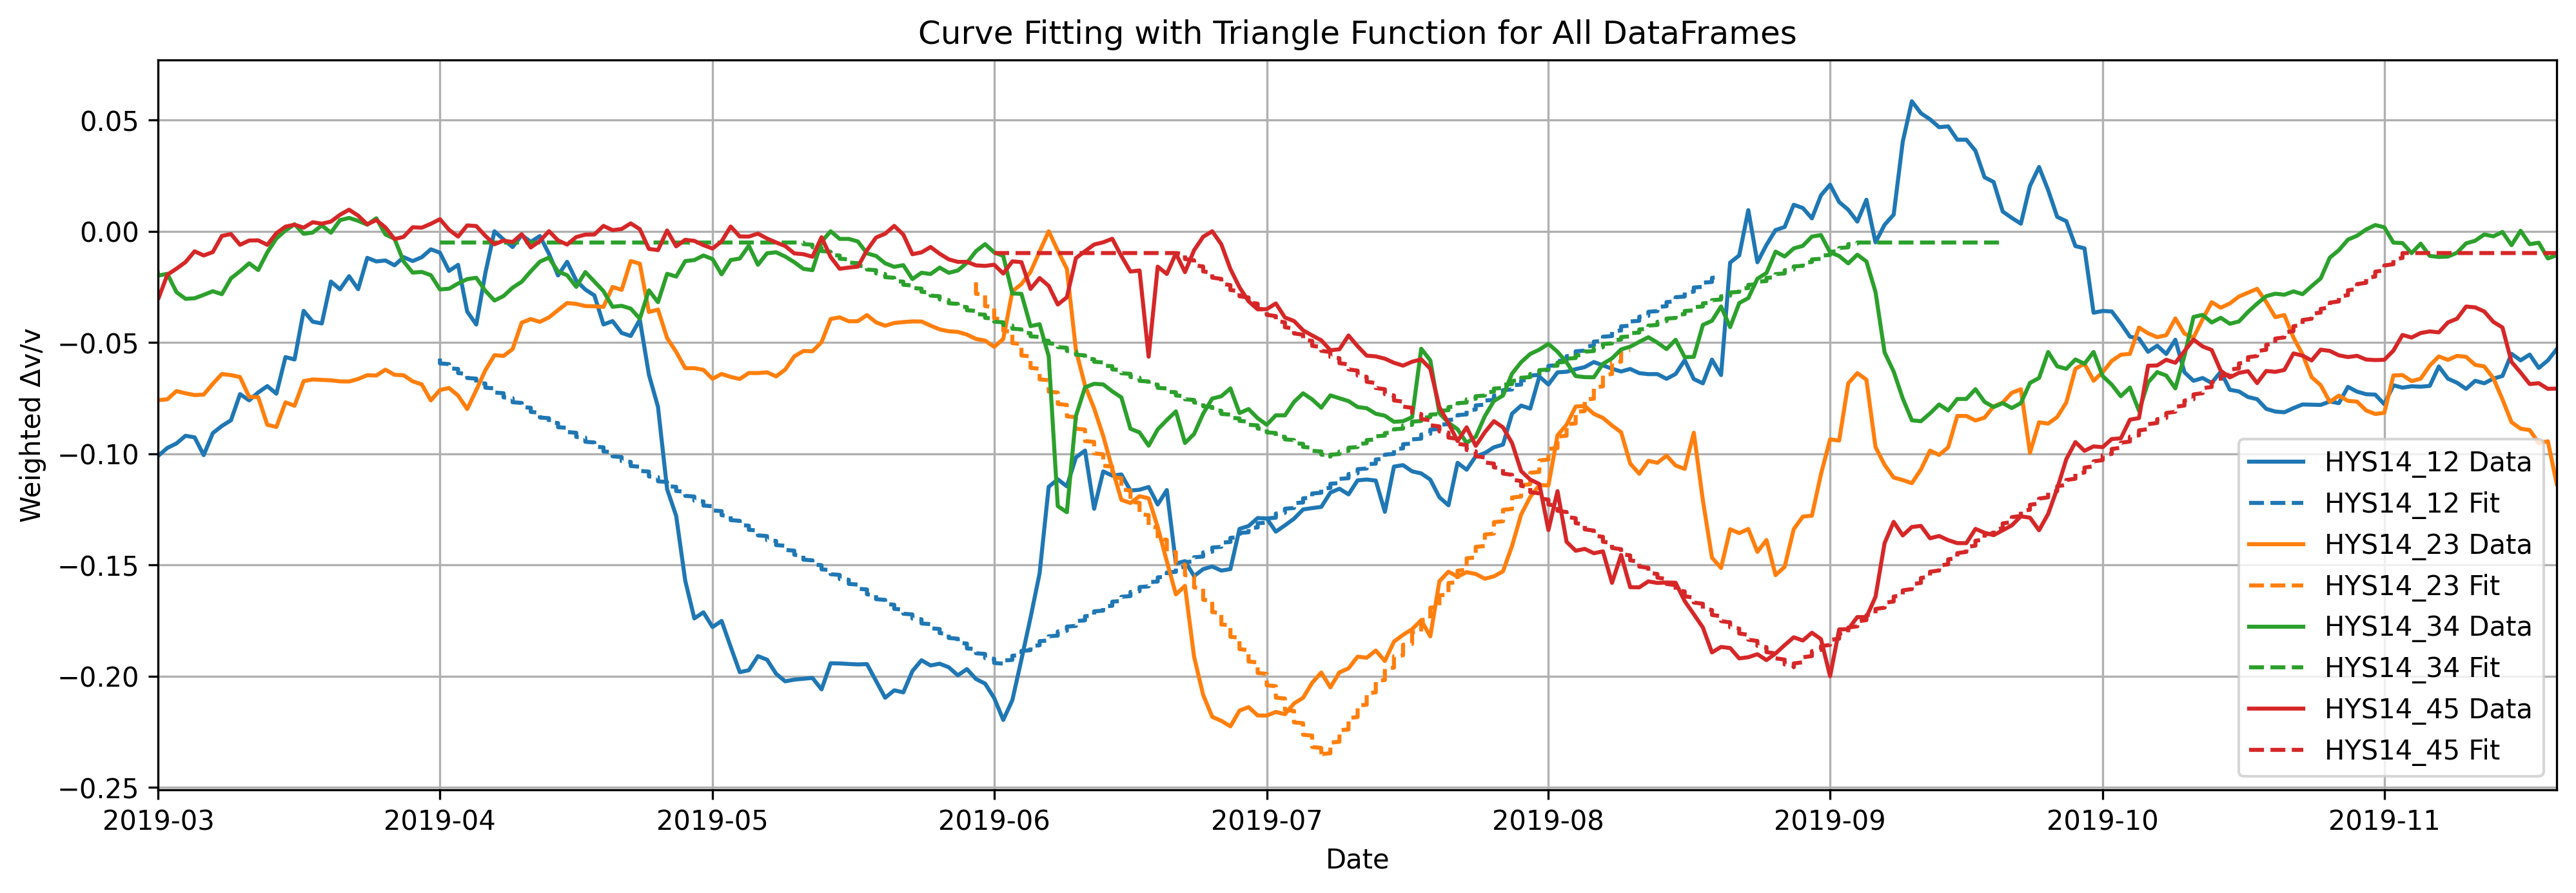

In [89]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the triangle function
def triangle_function(x, a, b, c):
    return a * np.maximum(0.05, 1 - np.abs(x - b) / c)

# List of file paths
file_paths = [
    'final_timeseries_data/HYS14_1-2.csv',
    'final_timeseries_data/HYS14_2-3.csv',
    'final_timeseries_data/HYS14_3-4.csv',
    'final_timeseries_data/HYS14_4-5.csv',
]

# Dictionary to store the DataFrames
dataframes = {}

# Read each CSV file into a DataFrame
for file_path in file_paths:
    base_name = file_path.split('/')[-1].split('.')[0]
    df_name = base_name.replace('-', '')
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    dataframes[df_name] = df

# Configuration for each DataFrame
fit_configurations = {
    'HYS14_12': {
        'start_fit_date': "2019-04-01",
        'end_fit_date': "2019-08-20",
        'initial_guess': [-5, None, 30]
    },
    'HYS14_23': {
        'start_fit_date': "2019-05-30",
        'end_fit_date': "2019-08-10",
        'initial_guess': [0.1, None, 30]
    },
    'HYS14_34': {
        'start_fit_date': "2019-04-01",
        'end_fit_date': "2019-09-20",
        'initial_guess': [0.1, None, 30]
    },
    'HYS14_45': {
        'start_fit_date': "2019-06-01",
        'end_fit_date': "2019-12-20",
        'initial_guess': [0.5, None, 30]
    },
}

# Create a combined plot
plt.figure(figsize=(16, 5), dpi=300)

# Process each DataFrame and plot on the same figure
for df_name, df in dataframes.items():
    config = fit_configurations[df_name]
    
    start_fit_date = pd.to_datetime(config['start_fit_date'])
    end_fit_date = pd.to_datetime(config['end_fit_date'])
    
    # Filter data for fitting
    filtered_data = df[(df.index >= start_fit_date) & (df.index <= end_fit_date)]
    x_data = filtered_data.index.map(lambda x: x.toordinal())
    y_data = filtered_data['Weighted Δv/v'].values - filtered_data['Weighted Δv/v'].max()
    
    # Set initial guess center to the mean of x_data if not provided
    if config['initial_guess'][1] is None:
        config['initial_guess'][1] = np.mean(x_data)
    
    # Perform curve fitting
    params, _ = curve_fit(triangle_function, x_data, y_data, p0=config['initial_guess'])
    
    # Generate fit data
    x_fit = np.linspace(x_data.min(), x_data.max(), 1000)
    y_fit = triangle_function(x_fit, *params)
    x_fit_dates = [pd.Timestamp.fromordinal(int(x)) for x in x_fit]
    
    # Plot original data
    data_line, = plt.plot(df.index, df['Weighted Δv/v'].values- filtered_data['Weighted Δv/v'].max(), label=f'{df_name} Data')
    
    # Plot fitted curve with the same color, dashed line
    plt.plot(x_fit_dates, y_fit, '--', color=data_line.get_color(), label=f'{df_name} Fit')

plt.xlabel('Date')
plt.ylabel('Weighted Δv/v')
plt.title('HYS14 2019 event at different frequencies')
start_date = pd.to_datetime("2019-03-01")
end_date = pd.to_datetime("2019-11-20")
plt.xlim([start_date, end_date])
plt.legend()
plt.grid(True)
plt.show()


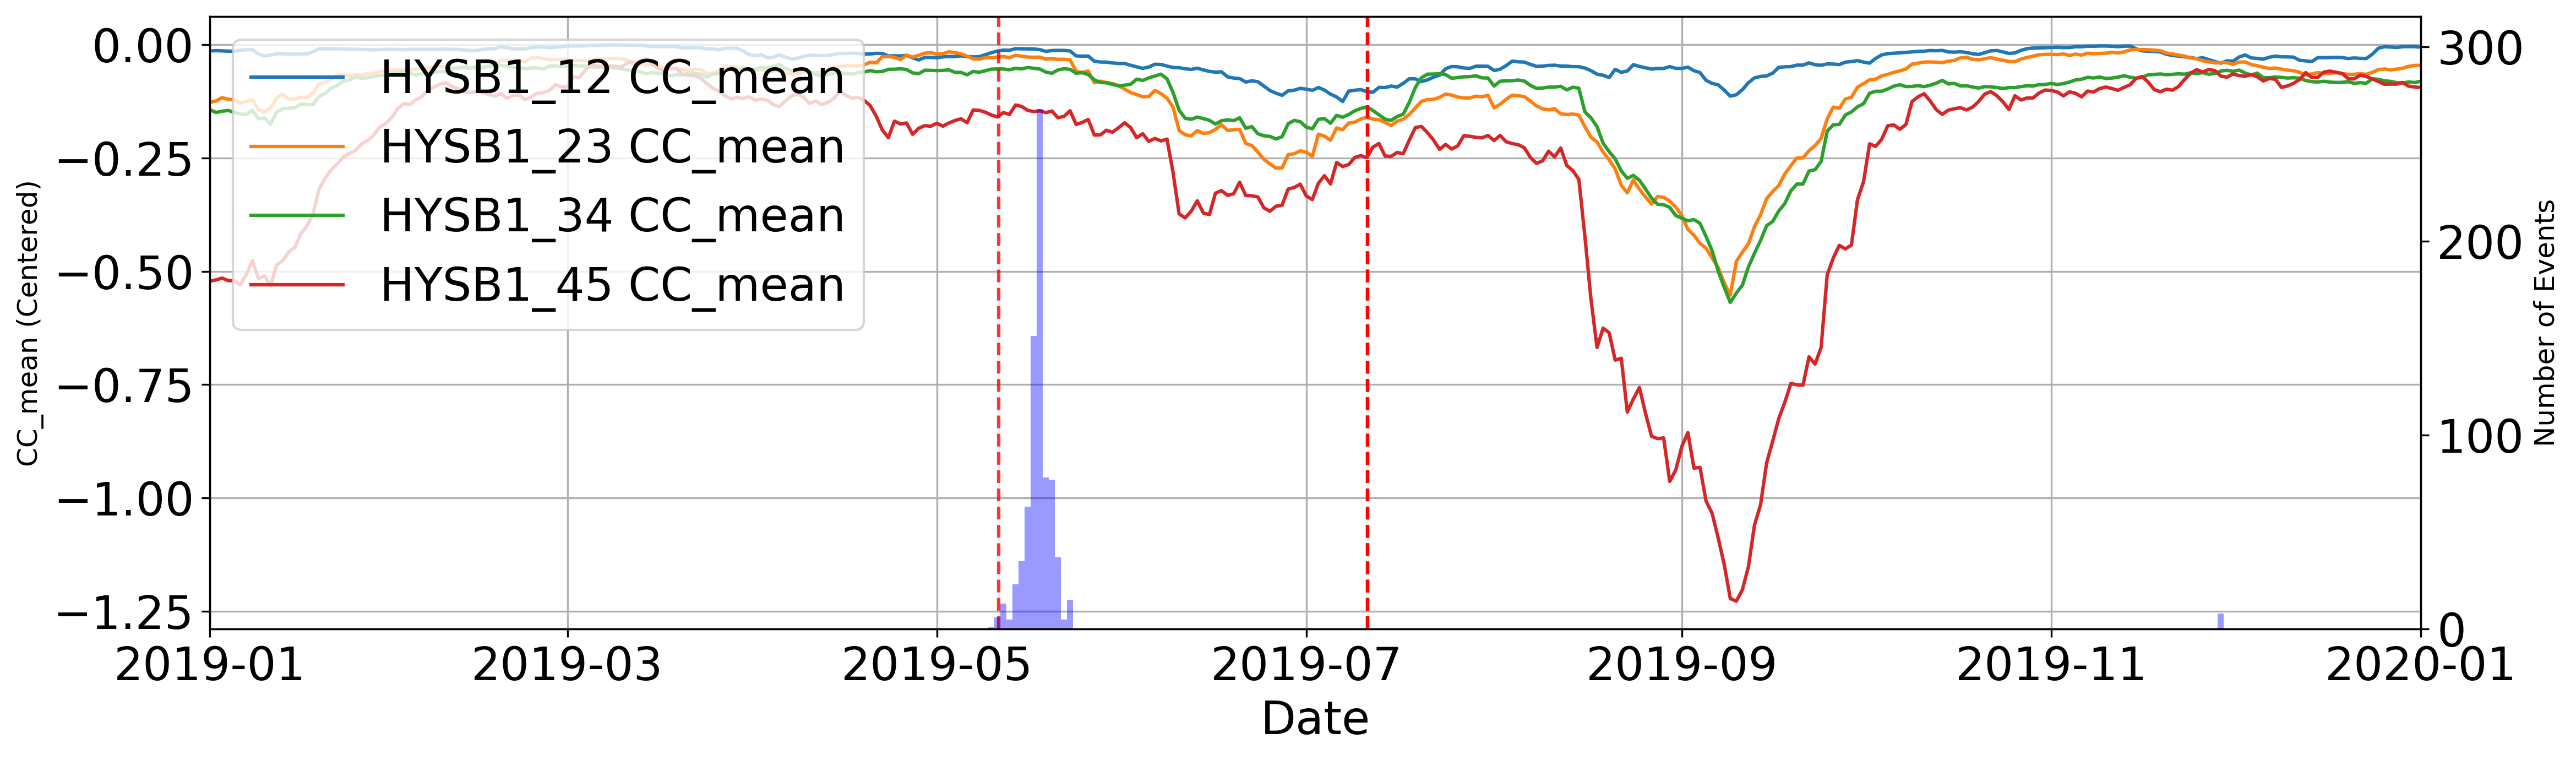

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of file paths
file_paths = [
    'final_timeseries_data/HYSB1_1-2.csv',
    'final_timeseries_data/HYSB1_2-3.csv',
    'final_timeseries_data/HYSB1_3-4.csv',
    'final_timeseries_data/HYSB1_4-5.csv',
]


# Tremor catalog dates
Tdates = [
    '2015-06-24 22:25:29.343674', '2015-10-21 07:10:22.988772', '2016-01-10 21:12:28.836671',
    '2016-02-27 12:03:06.102124', '2016-06-04 14:36:16.085195', '2016-06-04 14:37:36.094455',
    '2016-08-05 16:32:06.889686', '2016-08-14 00:35:30.246556', '2016-08-14 14:38:36.101401',
    '2016-08-20 22:07:09.216344', '2016-09-01 15:43:16.550527', '2016-09-17 02:04:20.863526',
    '2016-09-17 02:08:10.890149', '2016-09-24 18:19:27.635143', '2016-09-25 03:22:01.402940',
    '2016-09-25 03:24:51.422618', '2016-10-02 12:07:35.052668', '2016-11-18 05:22:02.236370',
    '2017-07-29 04:03:41.692326', '2017-09-06 10:28:44.366246', '2017-09-06 13:01:05.424239',
    '2017-09-06 13:13:25.509897', '2017-09-06 13:15:45.526103', '2017-09-06 13:19:15.550411',
    '2017-09-06 13:48:05.750666', '2017-09-06 13:55:55.805070', '2017-09-06 13:58:15.821276',
    '2017-09-06 14:06:35.879153', '2017-09-06 14:10:55.909249', '2017-09-06 14:31:06.049311',
    '2017-09-06 14:47:16.161593', '2017-09-06 15:14:26.350272', '2017-09-06 15:32:06.472971',
    '2017-09-06 16:52:17.029749', '2017-09-06 17:02:57.103831', '2017-09-06 17:04:37.115407',
    '2017-09-06 17:06:47.130455', '2017-09-06 17:37:27.343443', '2018-01-03 15:22:06.403519',
    '2018-02-10 14:43:16.133812', '2018-03-13 15:48:13.211856', '2018-06-26 12:51:25.357102',
    '2018-06-26 13:01:05.424239', '2018-09-19 07:27:03.104526', '2019-05-11 05:18:53.169843',
    '2019-07-11 03:20:01.777251', '2019-07-11 03:32:31.888329', '2019-07-11 03:46:02.008294',
    '2020-05-08 09:41:54.040977', '2020-07-09 09:30:43.963422'
]
datetime_objects = [pd.to_datetime(date) for date in Tdates]

# Path to filtered events data
filtered_events_path = 'Data/filtered_events_per_day_lat_44.csv'

# Dictionary to store the DataFrames
dataframes = {}

# Read each CSV file into a DataFrame
for file_path in file_paths:
    base_name = file_path.split('/')[-1].split('.')[0]
    df_name = base_name.replace('-', '')
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    dataframes[df_name] = df

# Load filtered events
filtered_events = pd.read_csv(filtered_events_path, index_col=0, parse_dates=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 5), dpi=300)

# Process each DataFrame and plot on the same figure
for df_name, df in dataframes.items():
    y_data = df['CC_mean'] - df['CC_mean'].max()
    ax1.plot(df.index, y_data, label=f'{df_name} CC_mean')

# Adding vertical red lines for significant tremor dates
for dt in datetime_objects:
    ax1.axvline(x=dt, color='red', linestyle='--', alpha=0.8)

# Add secondary y-axis for event counts
ax2 = ax1.twinx()
ax2.bar(filtered_events.index, filtered_events['Number of Events'], width=1, color='blue', alpha=0.4, label='Event Count')
ax2.set_ylabel('Number of Events', fontsize=12)
ax2.set_ylim([0, filtered_events['Number of Events'].max() * 1.1])

# Labels, legends, and formatting
ax1.set_xlabel('Date')
ax1.set_ylabel('CC_mean (Centered)', fontsize=12)
ax1.legend(loc='upper left')

start_date = pd.to_datetime("2019-01-01")
end_date = pd.to_datetime("2020-01-01")
ax1.set_xlim([start_date, end_date])

ax1.grid(True)
plt.tight_layout()
plt.show()


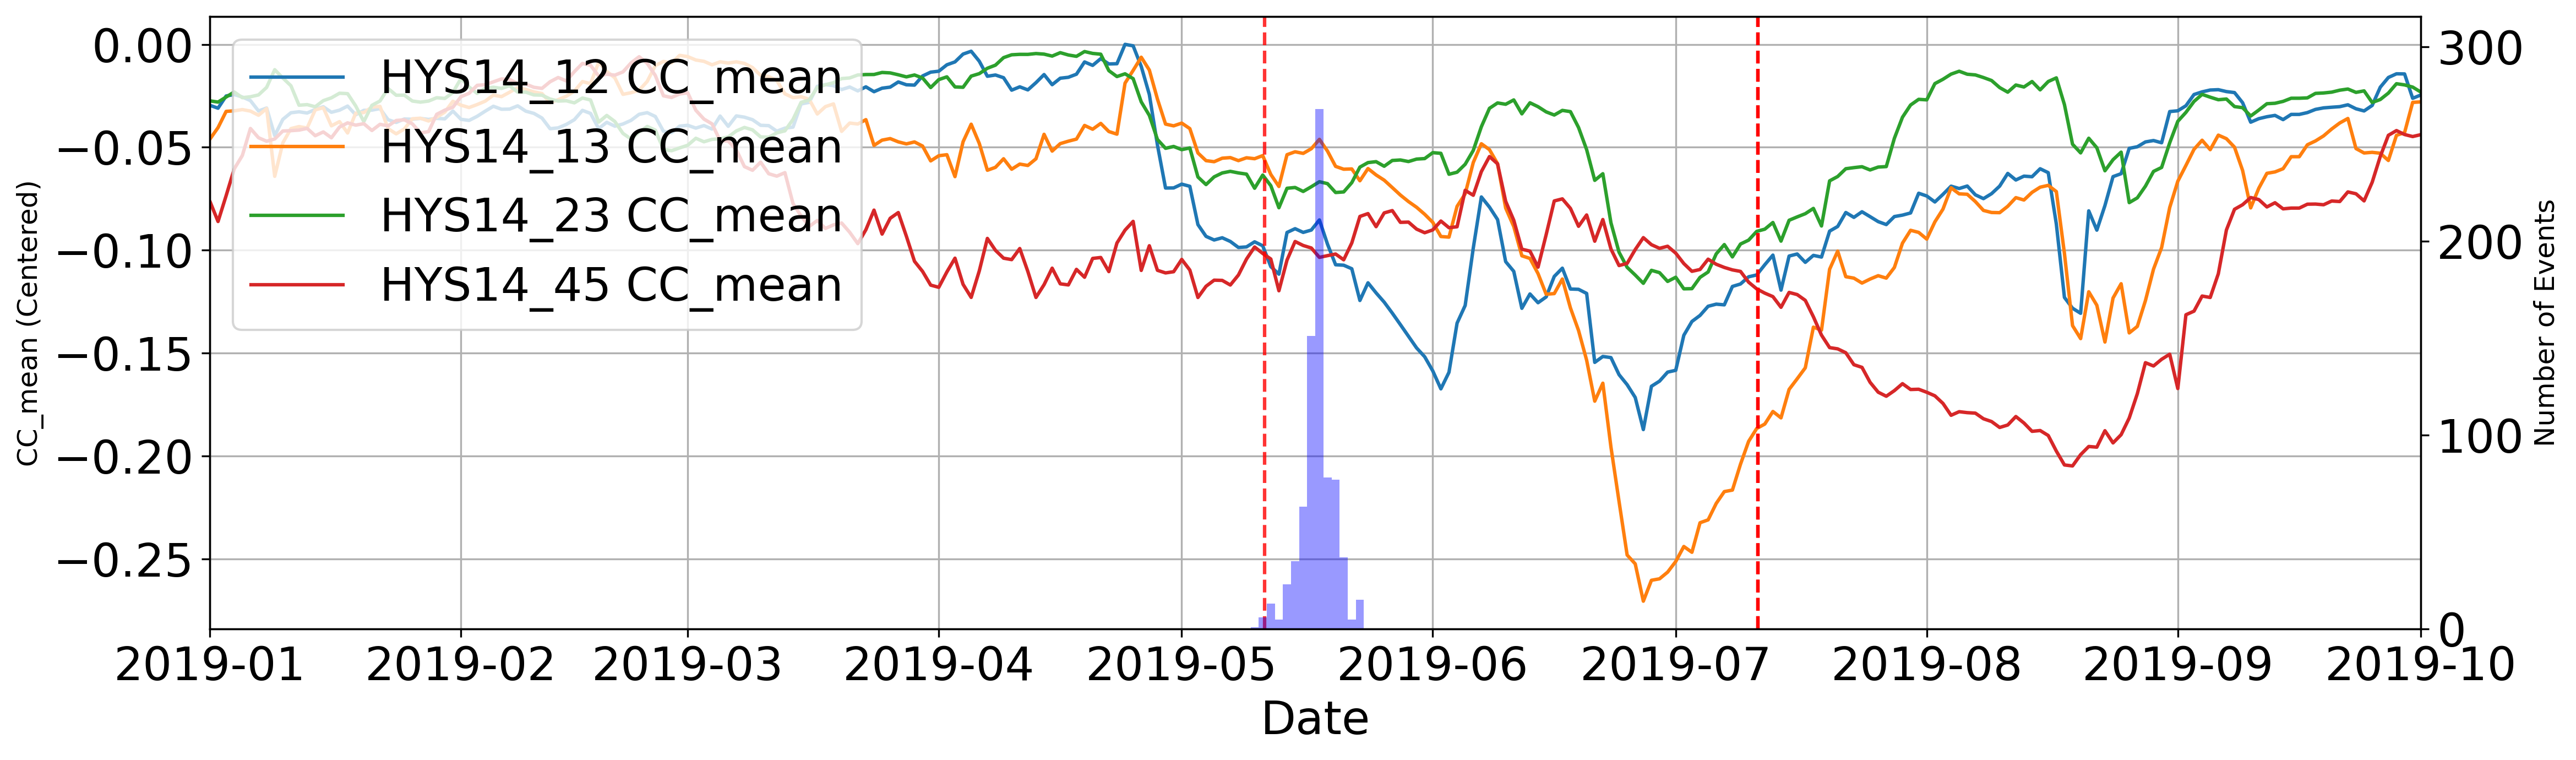

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of file paths
file_paths = [
    'final_timeseries_data/HYS14_1-2.csv',
    'final_timeseries_data/HYS14_1-3.csv',
    'final_timeseries_data/HYS14_2-3.csv',
    #'final_timeseries_data/HYS14_3-4.csv',
    'final_timeseries_data/HYS14_4-5.csv',
    # 'final_timeseries_data/HYS14_3-5.csv',  # Commented file
]


# Tremor catalog dates
Tdates = [
    '2015-06-24 22:25:29.343674', '2015-10-21 07:10:22.988772', '2016-01-10 21:12:28.836671',
    '2016-02-27 12:03:06.102124', '2016-06-04 14:36:16.085195', '2016-06-04 14:37:36.094455',
    '2016-08-05 16:32:06.889686', '2016-08-14 00:35:30.246556', '2016-08-14 14:38:36.101401',
    '2016-08-20 22:07:09.216344', '2016-09-01 15:43:16.550527', '2016-09-17 02:04:20.863526',
    '2016-09-17 02:08:10.890149', '2016-09-24 18:19:27.635143', '2016-09-25 03:22:01.402940',
    '2016-09-25 03:24:51.422618', '2016-10-02 12:07:35.052668', '2016-11-18 05:22:02.236370',
    '2017-07-29 04:03:41.692326', '2017-09-06 10:28:44.366246', '2017-09-06 13:01:05.424239',
    '2017-09-06 13:13:25.509897', '2017-09-06 13:15:45.526103', '2017-09-06 13:19:15.550411',
    '2017-09-06 13:48:05.750666', '2017-09-06 13:55:55.805070', '2017-09-06 13:58:15.821276',
    '2017-09-06 14:06:35.879153', '2017-09-06 14:10:55.909249', '2017-09-06 14:31:06.049311',
    '2017-09-06 14:47:16.161593', '2017-09-06 15:14:26.350272', '2017-09-06 15:32:06.472971',
    '2017-09-06 16:52:17.029749', '2017-09-06 17:02:57.103831', '2017-09-06 17:04:37.115407',
    '2017-09-06 17:06:47.130455', '2017-09-06 17:37:27.343443', '2018-01-03 15:22:06.403519',
    '2018-02-10 14:43:16.133812', '2018-03-13 15:48:13.211856', '2018-06-26 12:51:25.357102',
    '2018-06-26 13:01:05.424239', '2018-09-19 07:27:03.104526', '2019-05-11 05:18:53.169843',
    '2019-07-11 03:20:01.777251', '2019-07-11 03:32:31.888329', '2019-07-11 03:46:02.008294',
    '2020-05-08 09:41:54.040977', '2020-07-09 09:30:43.963422'
]
datetime_objects = [pd.to_datetime(date) for date in Tdates]

# Path to filtered events data
filtered_events_path = 'Data/filtered_events_per_day_lat_44.csv'

# Dictionary to store the DataFrames
dataframes = {}

# Read each CSV file into a DataFrame
for file_path in file_paths:
    base_name = file_path.split('/')[-1].split('.')[0]
    df_name = base_name.replace('-', '')
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    dataframes[df_name] = df

# Load filtered events
filtered_events = pd.read_csv(filtered_events_path, index_col=0, parse_dates=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 5), dpi=300)

# Process each DataFrame and plot on the same figure
for df_name, df in dataframes.items():
    y_data = df['CC_mean'] - df['CC_mean'].max()
    if df_name != 'HYS14_45':
        y_data = y_data*2.5
    ax1.plot(df.index, y_data, label=f'{df_name} CC_mean')

# Adding vertical red lines for significant tremor dates
for dt in datetime_objects:
    ax1.axvline(x=dt, color='red', linestyle='--', alpha=0.8)

# Add secondary y-axis for event counts
ax2 = ax1.twinx()
ax2.bar(filtered_events.index, filtered_events['Number of Events'], width=1, color='blue', alpha=0.4, label='Event Count')
ax2.set_ylabel('Number of Events', fontsize=12)
ax2.set_ylim([0, filtered_events['Number of Events'].max() * 1.1])

# Labels, legends, and formatting
ax1.set_xlabel('Date')
ax1.set_ylabel('CC_mean (Centered)', fontsize=12)
ax1.legend(loc='upper left')

start_date = pd.to_datetime("2019-01-01")
end_date = pd.to_datetime("2019-10-01")
ax1.set_xlim([start_date, end_date])

ax1.grid(True)
plt.tight_layout()
plt.show()


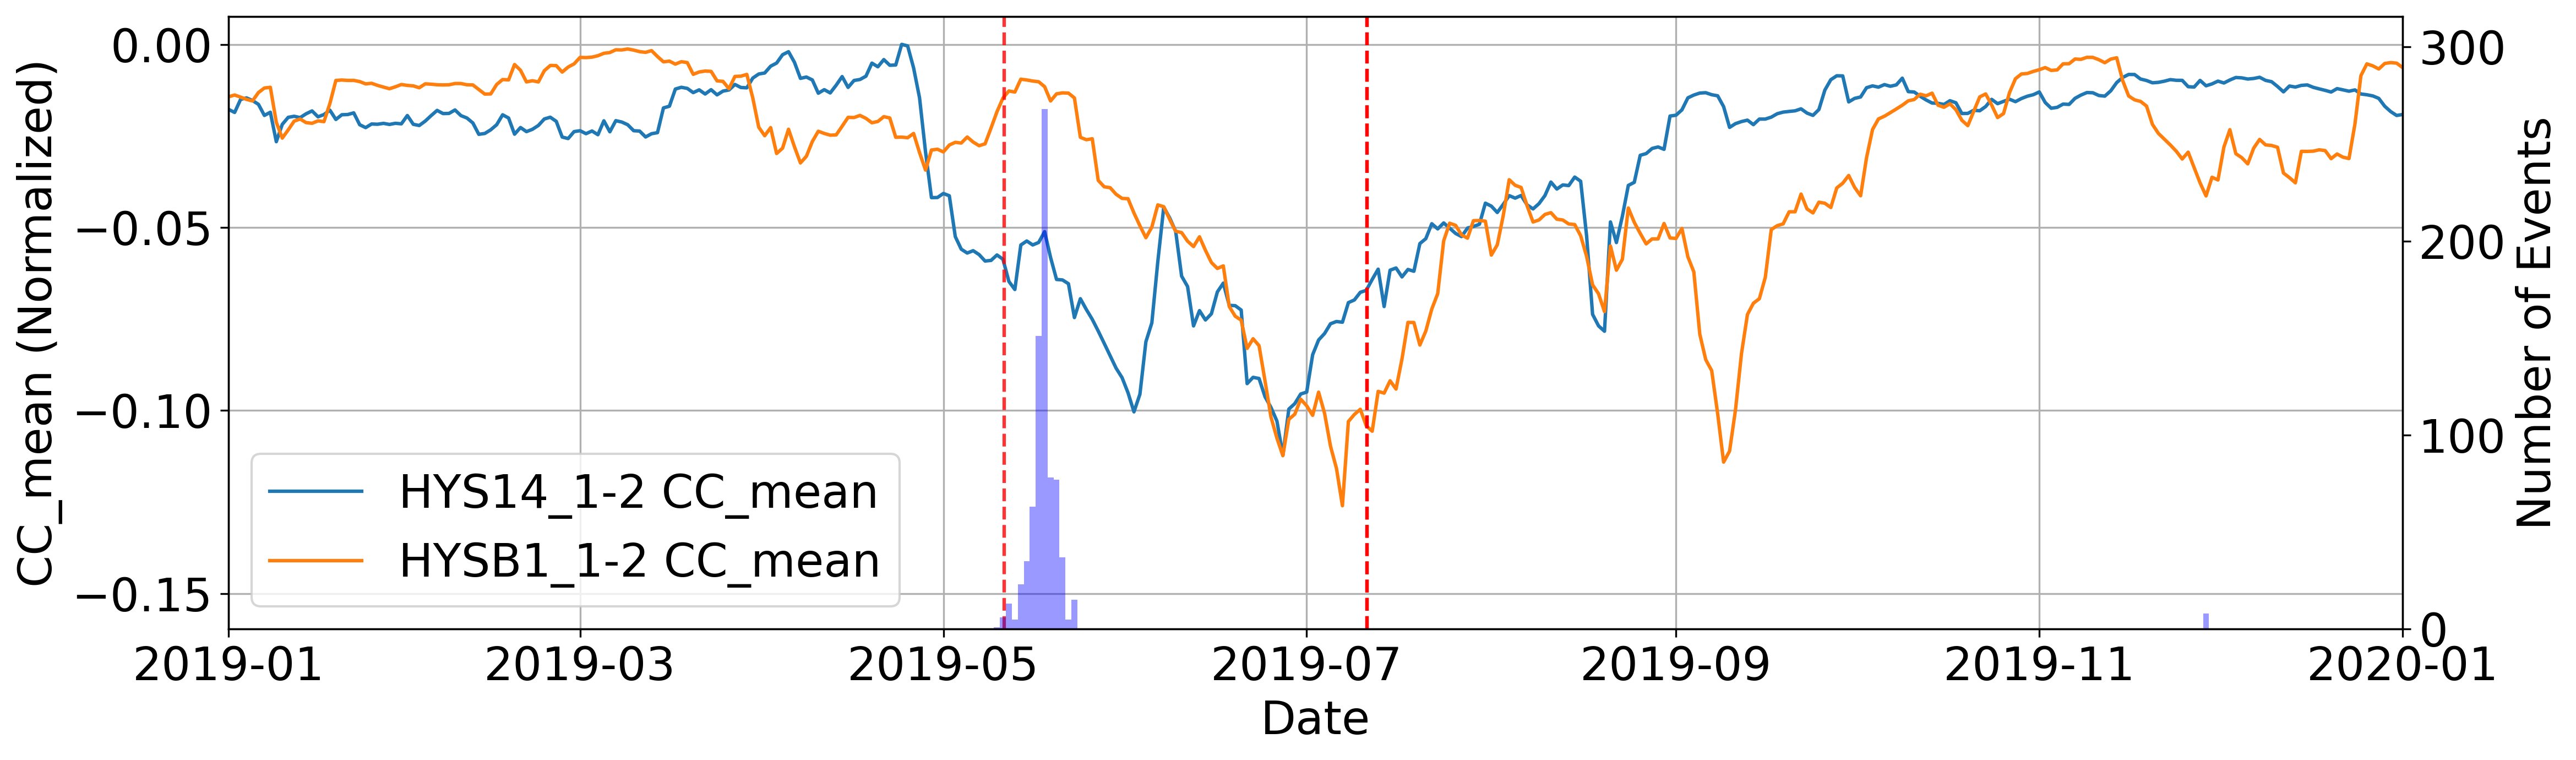

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of file paths
file_paths = [
    'final_timeseries_data/HYS14_1-2.csv',
    'final_timeseries_data/HYSB1_1-2.csv',
]


# Tremor catalog dates
Tdates = [
    '2015-06-24 22:25:29.343674', '2015-10-21 07:10:22.988772', '2016-01-10 21:12:28.836671',
    '2016-02-27 12:03:06.102124', '2016-06-04 14:36:16.085195', '2016-06-04 14:37:36.094455',
    '2016-08-05 16:32:06.889686', '2016-08-14 00:35:30.246556', '2016-08-14 14:38:36.101401',
    '2016-08-20 22:07:09.216344', '2016-09-01 15:43:16.550527', '2016-09-17 02:04:20.863526',
    '2016-09-17 02:08:10.890149', '2016-09-24 18:19:27.635143', '2016-09-25 03:22:01.402940',
    '2016-09-25 03:24:51.422618', '2016-10-02 12:07:35.052668', '2016-11-18 05:22:02.236370',
    '2017-07-29 04:03:41.692326', '2017-09-06 10:28:44.366246', '2017-09-06 13:01:05.424239',
    '2017-09-06 13:13:25.509897', '2017-09-06 13:15:45.526103', '2017-09-06 13:19:15.550411',
    '2017-09-06 13:48:05.750666', '2017-09-06 13:55:55.805070', '2017-09-06 13:58:15.821276',
    '2017-09-06 14:06:35.879153', '2017-09-06 14:10:55.909249', '2017-09-06 14:31:06.049311',
    '2017-09-06 14:47:16.161593', '2017-09-06 15:14:26.350272', '2017-09-06 15:32:06.472971',
    '2017-09-06 16:52:17.029749', '2017-09-06 17:02:57.103831', '2017-09-06 17:04:37.115407',
    '2017-09-06 17:06:47.130455', '2017-09-06 17:37:27.343443', '2018-01-03 15:22:06.403519',
    '2018-02-10 14:43:16.133812', '2018-03-13 15:48:13.211856', '2018-06-26 12:51:25.357102',
    '2018-06-26 13:01:05.424239', '2018-09-19 07:27:03.104526', '2019-05-11 05:18:53.169843',
    '2019-07-11 03:20:01.777251', '2019-07-11 03:32:31.888329', '2019-07-11 03:46:02.008294',
    '2020-05-08 09:41:54.040977', '2020-07-09 09:30:43.963422'
]
datetime_objects = [pd.to_datetime(date) for date in Tdates]

# Path to filtered events data
filtered_events_path = 'Data/filtered_events_per_day_lat_44.csv'

# Dictionary to store the DataFrames
dataframes = {}

# Read each CSV file into a DataFrame
for file_path in file_paths:
    base_name = file_path.split('/')[-1].split('.')[0]
    df_name = base_name.replace('-', '')
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    dataframes[df_name] = df

# Load filtered events
filtered_events = pd.read_csv(filtered_events_path, index_col=0, parse_dates=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 5), dpi=300)

# Process each DataFrame and plot on the same figure
for df_name, df in dataframes.items():
    y_data = df['CC_mean'] - df['CC_mean'].max()
    if df_name == 'HYS14_12':
        y_data =y_data*1.5
    ax1.plot(df.index, y_data, label=f'{df_name[0:7]}-{df_name[7]} CC_mean')

# Adding vertical red lines for significant tremor dates
for dt in datetime_objects:
    ax1.axvline(x=dt, color='red', linestyle='--', alpha=0.8)

# Add secondary y-axis for event counts
ax2 = ax1.twinx()
ax2.bar(filtered_events.index, filtered_events['Number of Events'], width=1, color='blue', alpha=0.4, label='Event Count')
ax2.set_ylabel('Number of Events', fontsize=20)
ax2.set_ylim([0, filtered_events['Number of Events'].max() * 1.1])

# Labels, legends, and formatting
ax1.set_xlabel('Date')
ax1.set_ylabel('CC_mean (Normalized)', fontsize=20)
ax1.legend(loc='lower left')

start_date = pd.to_datetime("2019-01-01")
end_date = pd.to_datetime("2020-01-01")
ax1.set_xlim([start_date, end_date])

ax1.grid(True)
plt.tight_layout()
plt.show()


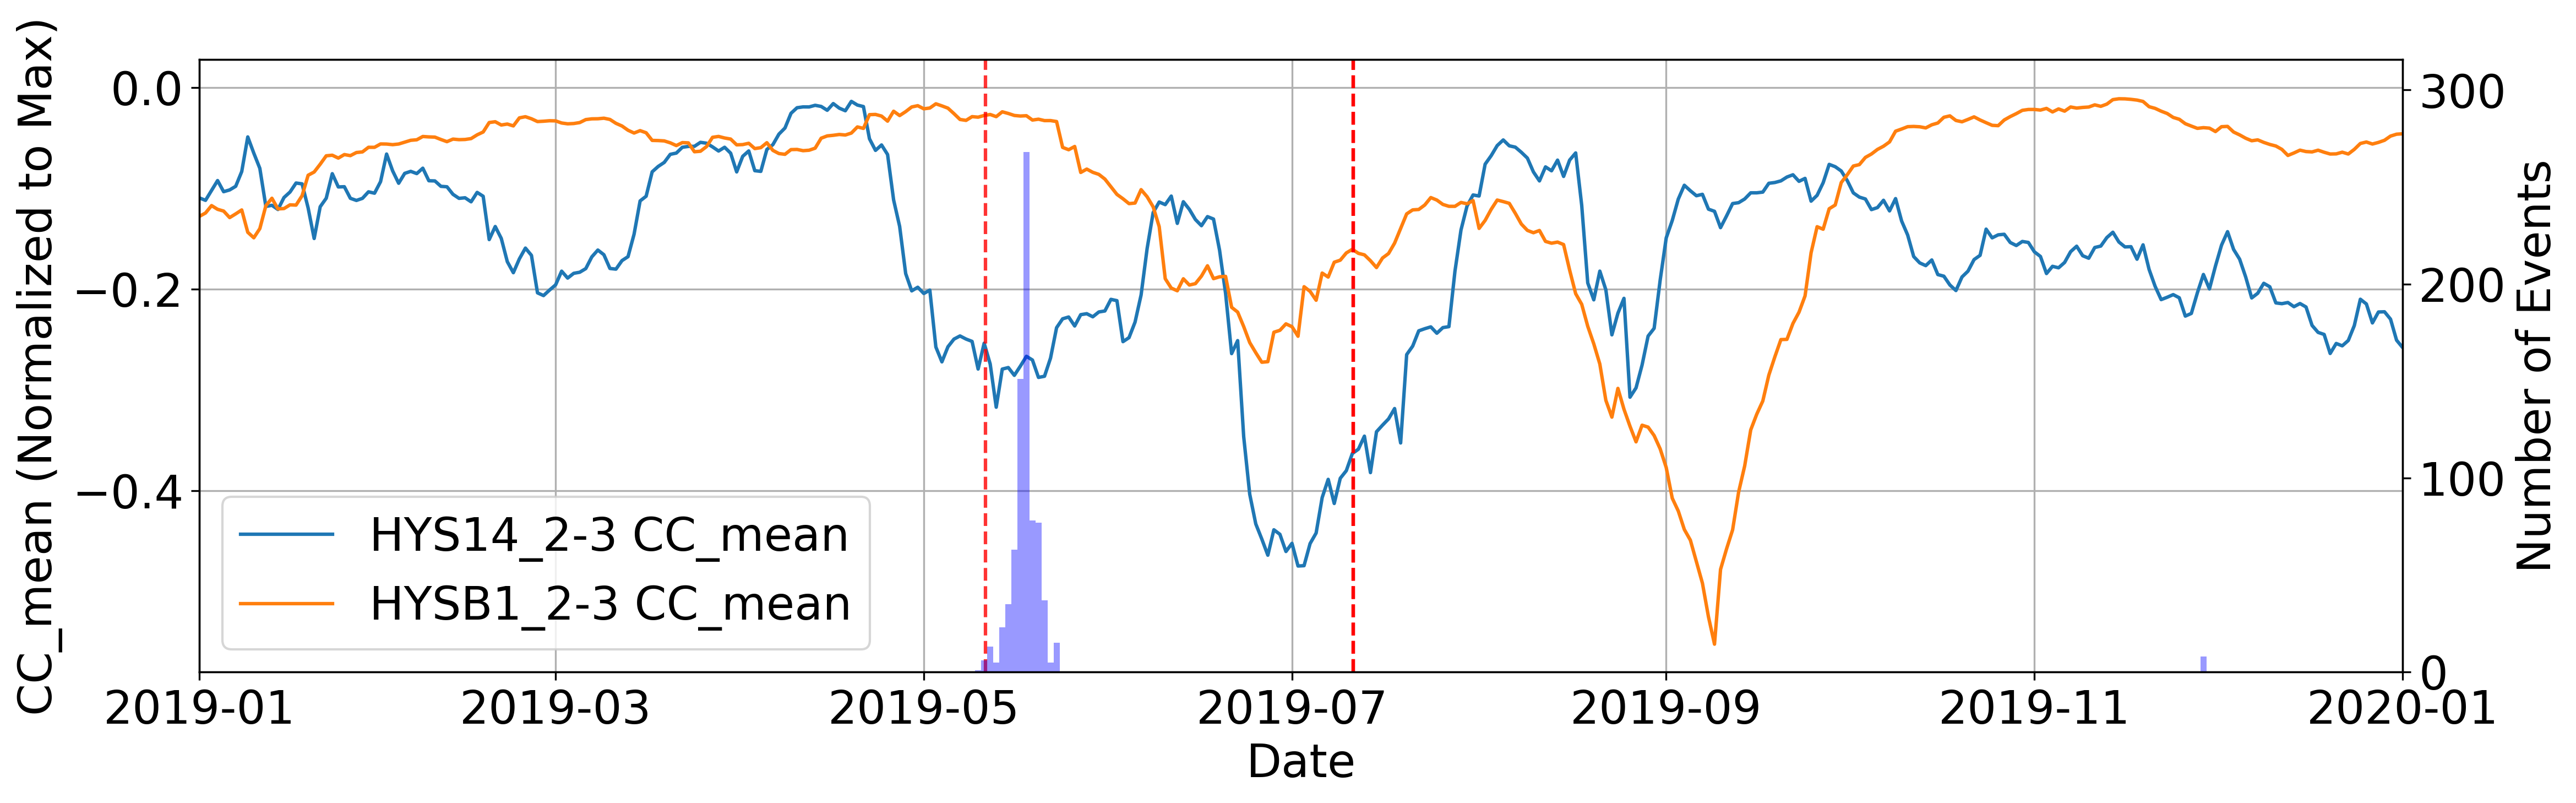

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of file paths
file_paths = [
    'final_timeseries_data/HYS14_2-3.csv',
    'final_timeseries_data/HYSB1_2-3.csv',
]


# Tremor catalog dates
Tdates = [
    '2015-06-24 22:25:29.343674', '2015-10-21 07:10:22.988772', '2016-01-10 21:12:28.836671',
    '2016-02-27 12:03:06.102124', '2016-06-04 14:36:16.085195', '2016-06-04 14:37:36.094455',
    '2016-08-05 16:32:06.889686', '2016-08-14 00:35:30.246556', '2016-08-14 14:38:36.101401',
    '2016-08-20 22:07:09.216344', '2016-09-01 15:43:16.550527', '2016-09-17 02:04:20.863526',
    '2016-09-17 02:08:10.890149', '2016-09-24 18:19:27.635143', '2016-09-25 03:22:01.402940',
    '2016-09-25 03:24:51.422618', '2016-10-02 12:07:35.052668', '2016-11-18 05:22:02.236370',
    '2017-07-29 04:03:41.692326', '2017-09-06 10:28:44.366246', '2017-09-06 13:01:05.424239',
    '2017-09-06 13:13:25.509897', '2017-09-06 13:15:45.526103', '2017-09-06 13:19:15.550411',
    '2017-09-06 13:48:05.750666', '2017-09-06 13:55:55.805070', '2017-09-06 13:58:15.821276',
    '2017-09-06 14:06:35.879153', '2017-09-06 14:10:55.909249', '2017-09-06 14:31:06.049311',
    '2017-09-06 14:47:16.161593', '2017-09-06 15:14:26.350272', '2017-09-06 15:32:06.472971',
    '2017-09-06 16:52:17.029749', '2017-09-06 17:02:57.103831', '2017-09-06 17:04:37.115407',
    '2017-09-06 17:06:47.130455', '2017-09-06 17:37:27.343443', '2018-01-03 15:22:06.403519',
    '2018-02-10 14:43:16.133812', '2018-03-13 15:48:13.211856', '2018-06-26 12:51:25.357102',
    '2018-06-26 13:01:05.424239', '2018-09-19 07:27:03.104526', '2019-05-11 05:18:53.169843',
    '2019-07-11 03:20:01.777251', '2019-07-11 03:32:31.888329', '2019-07-11 03:46:02.008294',
    '2020-05-08 09:41:54.040977', '2020-07-09 09:30:43.963422'
]
datetime_objects = [pd.to_datetime(date) for date in Tdates]

# Path to filtered events data
filtered_events_path = 'Data/filtered_events_per_day_lat_44.csv'

# Dictionary to store the DataFrames
dataframes = {}

# Read each CSV file into a DataFrame
for file_path in file_paths:
    base_name = file_path.split('/')[-1].split('.')[0]
    df_name = base_name.replace('-', '')
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    dataframes[df_name] = df

# Load filtered events
filtered_events = pd.read_csv(filtered_events_path, index_col=0, parse_dates=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 5), dpi=300)

# Process each DataFrame and plot on the same figure
for df_name, df in dataframes.items():
    y_data = df['CC_mean'] - df['CC_mean'].max()
    if df_name == 'HYS14_23':
        y_data =y_data*10
        
    ax1.plot(df.index, y_data, label=f'{df_name[0:7]}-{df_name[7]} CC_mean')

# Adding vertical red lines for significant tremor dates
for dt in datetime_objects:
    ax1.axvline(x=dt, color='red', linestyle='--', alpha=0.8)

# Add secondary y-axis for event counts
ax2 = ax1.twinx()
ax2.bar(filtered_events.index, filtered_events['Number of Events'], width=1, color='blue', alpha=0.4, label='Event Count')
ax2.set_ylabel('Number of Events', fontsize=20)
ax2.set_ylim([0, filtered_events['Number of Events'].max() * 1.1])

# Labels, legends, and formatting
ax1.set_xlabel('Date')
ax1.set_ylabel('CC_mean (Normalized to Max)', fontsize=20)
ax1.legend(loc='lower left')

start_date = pd.to_datetime("2019-01-01")
end_date = pd.to_datetime("2020-01-01")
ax1.set_xlim([start_date, end_date])

ax1.grid(True)
plt.tight_layout()
plt.show()


In [93]:
df_name

'HYSB1_23'

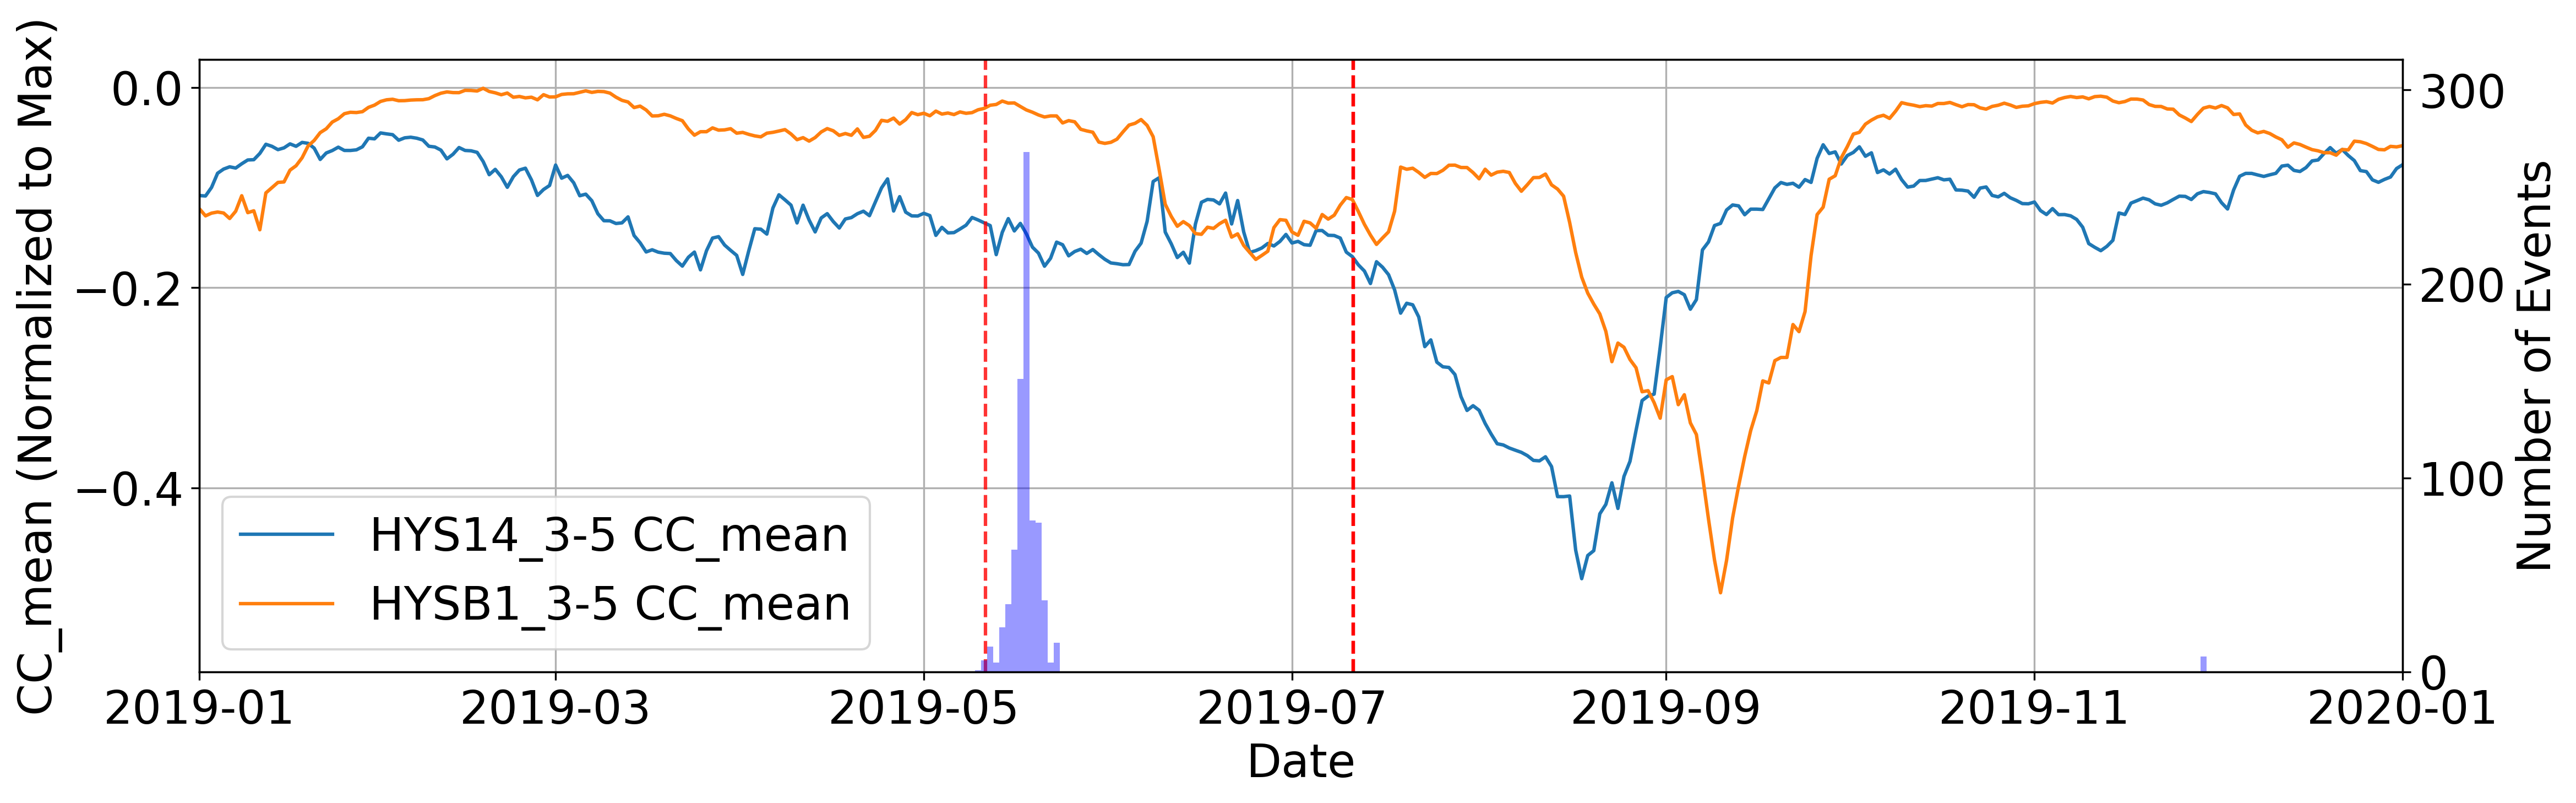

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of file paths
file_paths = [
    'final_timeseries_data/HYS14_3-5.csv',
    'final_timeseries_data/HYSB1_3-5.csv',
]


# Tremor catalog dates
Tdates = [
    '2015-06-24 22:25:29.343674', '2015-10-21 07:10:22.988772', '2016-01-10 21:12:28.836671',
    '2016-02-27 12:03:06.102124', '2016-06-04 14:36:16.085195', '2016-06-04 14:37:36.094455',
    '2016-08-05 16:32:06.889686', '2016-08-14 00:35:30.246556', '2016-08-14 14:38:36.101401',
    '2016-08-20 22:07:09.216344', '2016-09-01 15:43:16.550527', '2016-09-17 02:04:20.863526',
    '2016-09-17 02:08:10.890149', '2016-09-24 18:19:27.635143', '2016-09-25 03:22:01.402940',
    '2016-09-25 03:24:51.422618', '2016-10-02 12:07:35.052668', '2016-11-18 05:22:02.236370',
    '2017-07-29 04:03:41.692326', '2017-09-06 10:28:44.366246', '2017-09-06 13:01:05.424239',
    '2017-09-06 13:13:25.509897', '2017-09-06 13:15:45.526103', '2017-09-06 13:19:15.550411',
    '2017-09-06 13:48:05.750666', '2017-09-06 13:55:55.805070', '2017-09-06 13:58:15.821276',
    '2017-09-06 14:06:35.879153', '2017-09-06 14:10:55.909249', '2017-09-06 14:31:06.049311',
    '2017-09-06 14:47:16.161593', '2017-09-06 15:14:26.350272', '2017-09-06 15:32:06.472971',
    '2017-09-06 16:52:17.029749', '2017-09-06 17:02:57.103831', '2017-09-06 17:04:37.115407',
    '2017-09-06 17:06:47.130455', '2017-09-06 17:37:27.343443', '2018-01-03 15:22:06.403519',
    '2018-02-10 14:43:16.133812', '2018-03-13 15:48:13.211856', '2018-06-26 12:51:25.357102',
    '2018-06-26 13:01:05.424239', '2018-09-19 07:27:03.104526', '2019-05-11 05:18:53.169843',
    '2019-07-11 03:20:01.777251', '2019-07-11 03:32:31.888329', '2019-07-11 03:46:02.008294',
    '2020-05-08 09:41:54.040977', '2020-07-09 09:30:43.963422'
]
datetime_objects = [pd.to_datetime(date) for date in Tdates]

# Path to filtered events data
filtered_events_path = 'Data/filtered_events_per_day_lat_44.csv'

# Dictionary to store the DataFrames
dataframes = {}

# Read each CSV file into a DataFrame
for file_path in file_paths:
    base_name = file_path.split('/')[-1].split('.')[0]
    df_name = base_name.replace('-', '')
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    dataframes[df_name] = df

# Load filtered events
filtered_events = pd.read_csv(filtered_events_path, index_col=0, parse_dates=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 5), dpi=300)

# Process each DataFrame and plot on the same figure
for df_name, df in dataframes.items():
    y_data = df['CC_mean'] - df['CC_mean'].max()
    ax1.plot(df.index, y_data, label=f'{df_name[0:7]}-{df_name[7]} CC_mean')

# Adding vertical red lines for significant tremor dates
for dt in datetime_objects:
    ax1.axvline(x=dt, color='red', linestyle='--', alpha=0.8)

# Add secondary y-axis for event counts
ax2 = ax1.twinx()
ax2.bar(filtered_events.index, filtered_events['Number of Events'], width=1, color='blue', alpha=0.4, label='Event Count')
ax2.set_ylabel('Number of Events', fontsize=20)
ax2.set_ylim([0, filtered_events['Number of Events'].max() * 1.1])

# Labels, legends, and formatting
ax1.set_xlabel('Date')
ax1.set_ylabel('CC_mean (Normalized to Max)', fontsize=20)
ax1.legend(loc='lower left')

start_date = pd.to_datetime("2019-01-01")
end_date = pd.to_datetime("2020-01-01")
ax1.set_xlim([start_date, end_date])

ax1.grid(True)
plt.tight_layout()
plt.show()
